## Stock Price Predictor

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf

In [3]:
# code = input("Enter code of stock:")
code='msft'
data = yf.download(code, start='2000-01-01', end='2022-01-01')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,58.687500,59.312500,56.000000,58.281250,36.452660,53228400
2000-01-04,56.781250,58.562500,56.125000,56.312500,35.221275,54119000
2000-01-05,55.562500,58.187500,54.687500,56.906250,35.592636,64059600
2000-01-06,56.093750,56.937500,54.187500,55.000000,34.400360,54976600
2000-01-07,54.312500,56.125000,53.656250,55.718750,34.849899,62013600
...,...,...,...,...,...,...
2021-12-27,335.459991,342.480011,335.429993,342.450012,339.270996,19947000
2021-12-28,343.149994,343.809998,340.320007,341.250000,338.082123,15661500
2021-12-29,341.299988,344.299988,339.679993,341.950012,338.775635,15042000


In [4]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5536 entries, 2000-01-03 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5536 non-null   float64
 1   High       5536 non-null   float64
 2   Low        5536 non-null   float64
 3   Close      5536 non-null   float64
 4   Adj Close  5536 non-null   float64
 5   Volume     5536 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 302.8 KB
None


In [6]:
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  5536.000000  5536.000000  5536.000000  5536.000000  5536.000000   
mean     59.773141    60.376303    59.167282    59.793526    52.882697   
std      63.337446    63.907661    62.759767    63.387158    64.665666   
min      15.200000    15.620000    14.870000    15.150000    11.404860   
25%      26.820000    27.100000    26.530001    26.840000    18.921104   
50%      30.755000    31.085000    30.474999    30.780001    22.487790   
75%      55.985000    56.630001    55.432500    55.940625    50.134823   
max     344.619995   349.670013   342.200012   343.109985   339.924835   

             Volume  
count  5.536000e+03  
mean   5.319225e+07  
std    3.118415e+07  
min    7.425600e+06  
25%    3.058150e+07  
50%    4.848960e+07  
75%    6.671855e+07  
max    5.910522e+08  


Text(0.5, 0, 'Year')

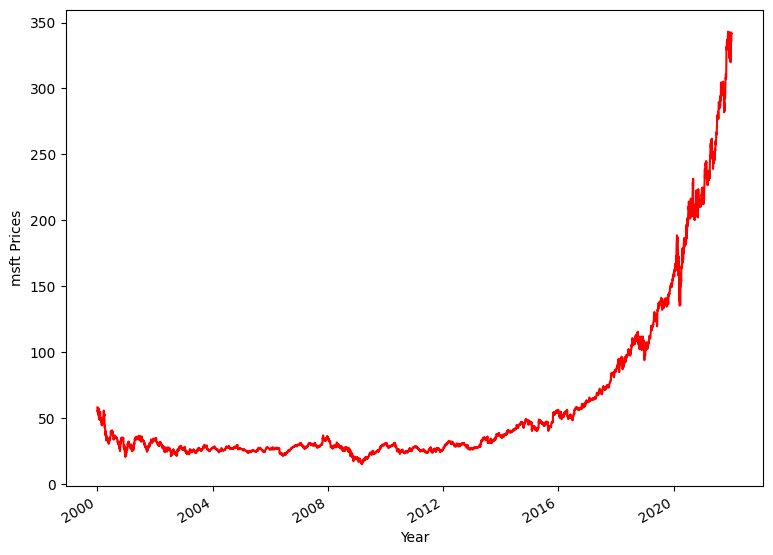

In [7]:
data['Close'].plot(figsize=(9,7),color='r')
plt.ylabel(f'{code} Prices')
plt.xlabel('Year')

/tmp/ipykernel_4474/1954477502.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Close'],color='r')


<AxesSubplot:xlabel='Close', ylabel='Density'>

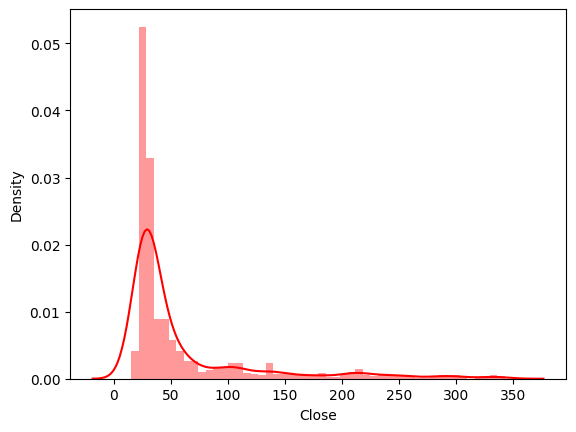

In [8]:
sns.distplot(data['Close'],color='r')

<AxesSubplot:xlabel='Close', ylabel='Count'>

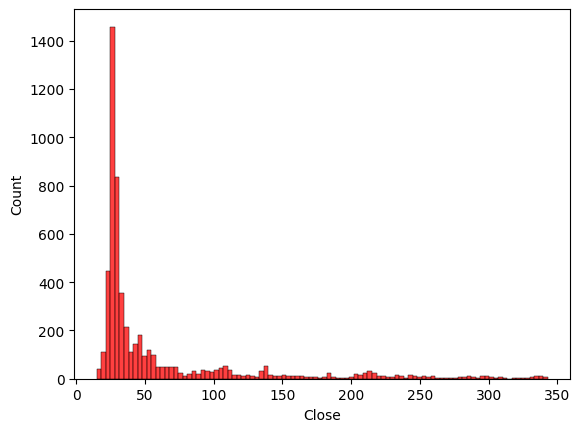

In [9]:
sns.histplot(data['Close'],color='r')

<AxesSubplot:xlabel='Open', ylabel='Count'>

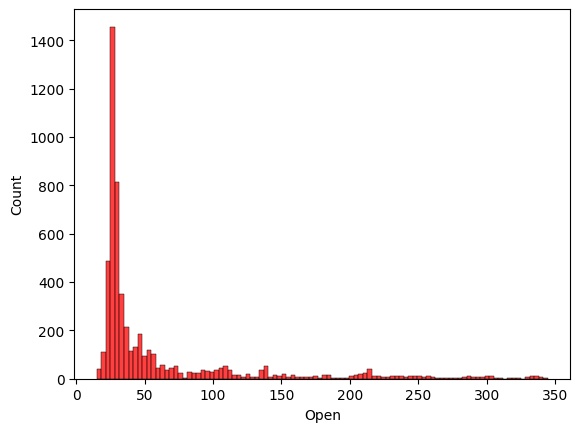

In [10]:
sns.histplot(data['Open'],color='r')

### Modelling

In [11]:
from sklearn.model_selection import train_test_split
X = data.drop('Close',axis=1)
Y = data.Close
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8)

#### Linear regression

In [12]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,Y_train)
pred_linear_reg = reg.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
mse= mean_squared_error(Y_test,pred_linear_reg)
rmse=np.sqrt(mse)
r2 = r2_score(Y_test,pred_linear_reg)
print(f'MSE:{mse}\nRMSE:{rmse}\nR2_Score:{r2}')

MSE:0.35434678640213885
RMSE:0.5952703473230788
R2_Score:0.9999113166068403


#### Lasso and Ridge (Regularization)

In [14]:
from sklearn.linear_model import Lasso, Ridge
l = Lasso()
l.fit(X_train,Y_train)
pred_lasso = l.predict(X_test)

mse= mean_squared_error(Y_test,pred_lasso)
rmse=np.sqrt(mse)
r2 = r2_score(Y_test,pred_lasso)
print(f'MSE:{mse}\nRMSE:{rmse}\nR2_Score:{r2}')


MSE:1.0307608349794841
RMSE:1.015263923804783
R2_Score:0.9997420285102334


/home/pradeep/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.416e+03, tolerance: 1.781e+03
  model = cd_fast.enet_coordinate_descent(


In [15]:
r = Ridge()
r.fit(X_train,Y_train)
pred_ridge = r.predict(X_test)

mse= mean_squared_error(Y_test,pred_ridge)
rmse=np.sqrt(mse)
r2 = r2_score(Y_test,pred_ridge)
print(f'MSE:{mse}\nRMSE:{rmse}\nR2_Score:{r2}')

MSE:0.3543013489340327
RMSE:0.5952321806942503
R2_Score:0.9999113279786066


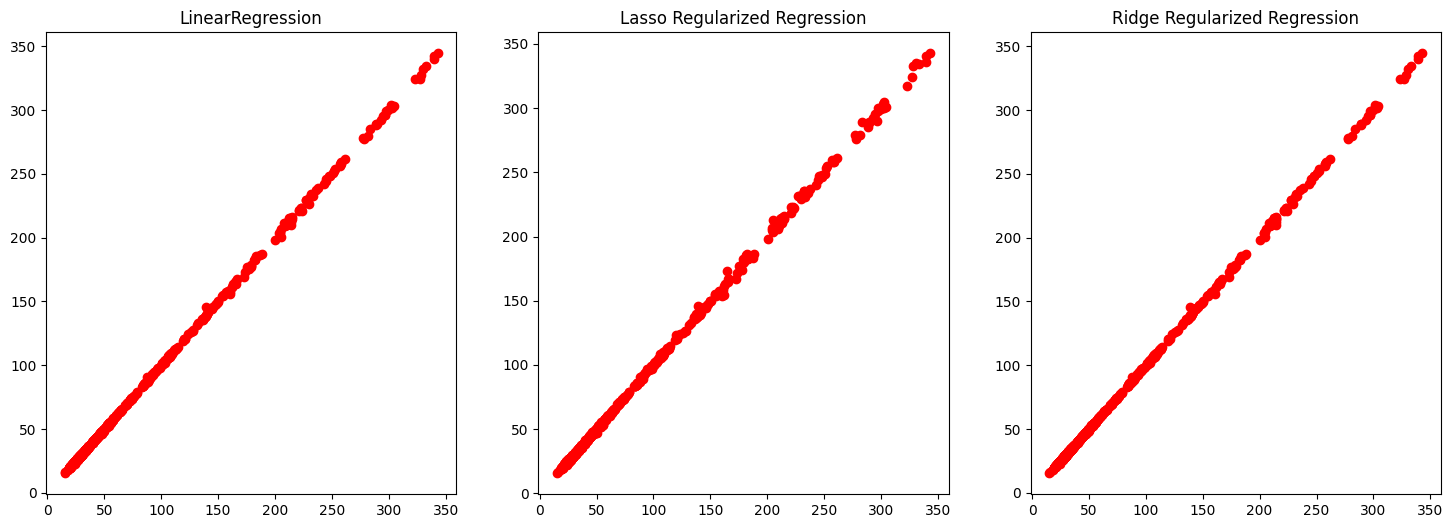

In [16]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.scatter(Y_test,pred_linear_reg,color='r')
# plt.plot(Y_test,Y_test,color='b')
plt.title('LinearRegression')
plt.subplot(1,3,2)
plt.scatter(Y_test,pred_lasso,color='r')
# plt.plot(Y_test,Y_test,color='b')
plt.title('Lasso Regularized Regression')
plt.subplot(1,3,3)
plt.scatter(Y_test,pred_ridge,color='r')
# plt.plot(Y_test,Y_test,color='b')
plt.title('Ridge Regularized Regression')
plt.show()